<a href="https://colab.research.google.com/github/Debo12/Google_Colab_Project/blob/master/02_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import sklearn.datasets as sk
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [35]:
breast_cancer = sk.load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target

In [36]:
data = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
data['output'] = breast_cancer.target
X = data.drop(columns='output', axis=1)
Y = data['output']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)

#Perceptron Class

In [37]:
X_train = X_train.values
X_test = X_test.values

$y =1, \mbox{if} \sum_i w_i x_i >= b$

$y =0, \mbox{otherwise}$

In [38]:
class Perceptron:
  def __init__(self):
    self.w = None
    self.b = None

  def model(self, x):
    return 1 if np.dot(self.w, x) >= self.b else 0

  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self, X, Y):
    self.w = np.ones(X.shape[1])
    self.b = 0

    accuracy = {}
    
    for (x, y) in zip(X, Y):
      y_pred = self.model(x)
      if y==1 and y_pred==0:
        self.w += x
        self.b += 1
      elif y==0 and y_pred==1:
        self.w -= x
        self.b -= 1

In [39]:
perceptron = Perceptron()

In [40]:
perceptron.fit(X_train, Y_train)

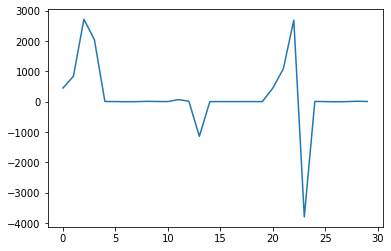

In [41]:
plt.plot(perceptron.w)
plt.show()

In [42]:
# accuracy score on train data
Y_pred_train = perceptron.predict(X_train)
print('Accuracy score: ', accuracy_score(Y_pred_train, Y_train))

Accuracy score:  0.373046875


In [43]:
# accuracy score on train data
Y_pred_test = perceptron.predict(X_test)
print('Accuracy score: ', accuracy_score(Y_pred_test, Y_test))

Accuracy score:  0.3684210526315789


In [44]:
print(perceptron.w)

[ 4.4787000e+02  8.3489000e+02  2.7157700e+03  2.0408000e+03
  5.7084700e+00  2.0157400e+00 -2.3629660e+00 -7.8631100e-01
  9.9227000e+00  4.5390700e+00  3.2492000e+00  6.7091400e+01
  1.3170500e+01 -1.1429410e+03  1.3688870e+00  1.4125040e+00
  1.2378939e+00  1.1849880e+00  2.0698010e+00  1.1560210e+00
  4.4626900e+02  1.0824500e+03  2.6876200e+03 -3.7992000e+03
  7.2313300e+00  1.2725100e+00 -3.1415070e+00 -7.8600000e-02
  1.4028700e+01  4.9343900e+00]


In [45]:
class Perceptron:
  def __init__(self):
    self.w = None
    self.b = None

  def model(self, x):
    return 1 if np.dot(self.w, x) >= self.b else 0

  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self, X, Y, epochs=2):
    self.w = np.ones(X.shape[1])
    self.b = 0

    accuracy = {}
    max_accuracy = 0

    for i in range(epochs):
      for (x, y) in zip(X, Y):
        y_pred = self.model(x)
        if y==1 and y_pred==0:
          self.w += x
          self.b += 1
        elif y==0 and y_pred==1:
          self.w -= x
          self.b -= 1
          
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if(accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]

    print(max_accuracy)

    plt.plot(list(accuracy.values()))
    plt.show()

In [46]:
perceptron = Perceptron()

0.921875


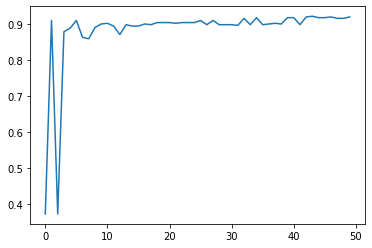

In [47]:
perceptron.fit(X_train, Y_train, 50)

**Hyper Parameter:** epoch value is not related to learning model but the value is responsible for accuracy.

In [61]:
# Checkpoints to store the w and b when highest accuracy in learning model
class Perceptron:
  def __init__(self):
    self.w = None
    self.b = None

  def model(self, x):
    return 1 if np.dot(self.w, x) >= self.b else 0

  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self, X, Y, epochs=2, lr=1):
    self.w = np.ones(X.shape[1])
    self.b = 0
    checkptb = 0
    checkptw = []

    accuracy = {}
    max_accuracy = 0

    for i in range(epochs):
      for (x, y) in zip(X, Y):
        y_pred = self.model(x)
        if y==1 and y_pred==0:
          self.w += lr * x
          self.b += lr * 1
        elif y==0 and y_pred==1:
          self.w -= lr * x
          self.b -= lr * 1
          
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if(accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        checkptb = self.b
        checkptw = self.w

    self.b = checkptb
    self.w = checkptw

    print(max_accuracy)

    plt.plot(list(accuracy.values()))
    plt.ylim([0, 1])
    plt.show()

In [62]:
perceptron = Perceptron()

0.947265625


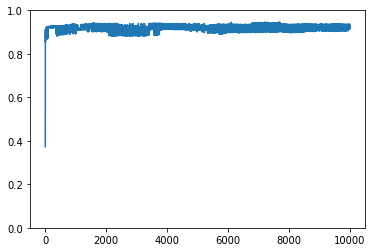

In [63]:
perceptron.fit(X_train, Y_train, 10000, 0.01)

In [65]:
Y_pred_train = perceptron.predict(X_train)
print('Accuracy: ', accuracy_score(Y_pred_train, Y_train))

Accuracy:  0.935546875


In [66]:
#Find accuracy in the test data
Y_pred_test = perceptron.predict(X_test)
print('Test accuracy: ', accuracy_score(Y_pred_test, Y_test))

Test accuracy:  0.9122807017543859
